In [3]:
#Read SST files - July 2021
import datetime as dt
import glob
import netCDF4 as nc
import numpy as np
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cmocean
from gsw import sigma0
import cartopy.crs as ccrs
import cartopy.feature as cfeature

os.chdir('/Users/epauthen/Documents/Research/Postdoc_Ifremer/')
os.getcwd()

'/Users/epauthen/Documents/Research/Postdoc_Ifremer'

In [4]:
path = '/Users/epauthen/Documents/Database/SST/ESACCI-GLO-SST-L4-REP-OBS-SST/'
mlist = list(['01','02','03','04','05','06','07','08','09','10','11','12'])
mm = '12'
yy = 1993
#mm = '06'
for yy in range(1993,2020):
    for mm in mlist:
        ds = xr.open_mfdataset(path + str(yy) + '/' + mm + '/*.nc', combine='nested', concat_dim='time')
        ds = ds.drop(['sea_ice_fraction','mask'])
        dsub = ds.where((ds.lon<=-25) & (ds.lon>=-85) & (ds.lat<=55) & (ds.lat>=18), drop=True)
        dsub.to_netcdf('/Users/epauthen/Documents/Database/SST/SST_Gulf_Stream/SST_Gulf_Stream_' + str(yy) + '_' + mm + '.nc')
        print(yy)
        print(mm)


2005
01
2005
02
2005
03
2005
04
2005
05
2005
06
2005
07
2005
08
2005
09
2005
10
2005
11
2005
12
2006
01
2006
02
2006
03
2006
04
2006
05
2006
06
2006
07
2006
08
2006
09
2006
10
2006
11
2006
12
2007
01
2007
02
2007
03
2007
04
2007
05
2007
06
2007
07
2007
08
2007
09
2007
10
2007
11
2007
12
2008
01
2008
02
2008
03
2008
04
2008
05
2008
06
2008
07
2008
08
2008
09
2008
10
2008
11
2008
12
2009
01
2009
02
2009
03
2009
04
2009
05
2009
06
2009
07
2009
08
2009
09
2009
10
2009
11
2009
12


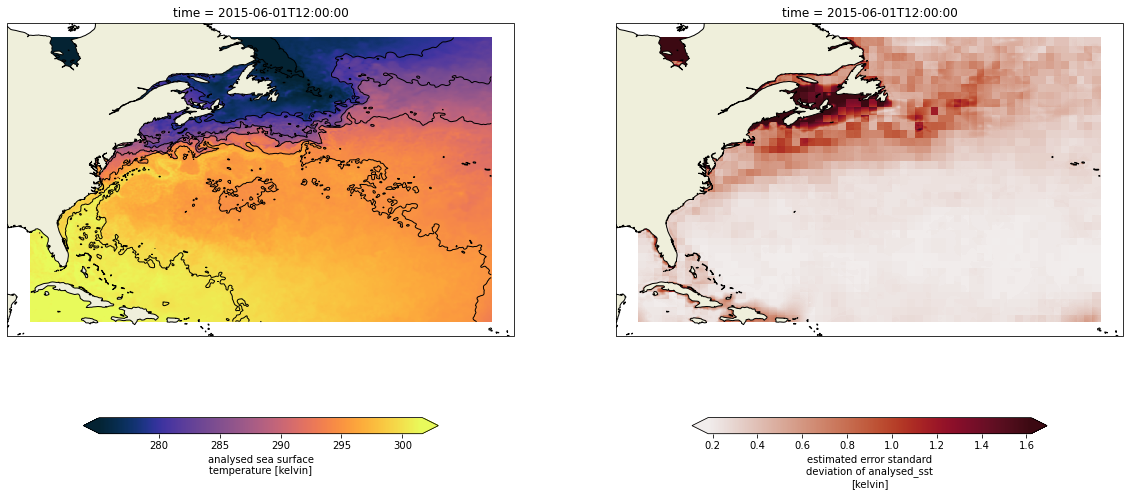

In [5]:
#PLOT
land_feature = cfeature.NaturalEarthFeature(category='physical', name='land', scale='50m', facecolor=[0.9375, 0.9375, 0.859375])
fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection=ccrs.PlateCarree()),figsize = (20,10)) 

dsub['analysed_sst'].isel(time=0).plot(ax=ax[0],
                  cmap=cmocean.cm.thermal,center=False,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
                  robust=True)
ax[0].add_feature(land_feature, edgecolor='black')
ax[0].contour(dsub['lon'],dsub['lat'],dsub['analysed_sst'].isel(time=0),colors = "black",linewidths = 1)

dsub['analysis_uncertainty'].isel(time=0).plot(ax=ax[1],
                  cmap=cmocean.cm.amp,center=False,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
                  robust=True)
ax[1].add_feature(land_feature, edgecolor='black')